In [6]:
import os, sys
lib_path = os.path.abspath(os.path.join('..','..', '..', 'utils'))
sys.path.append(lib_path)
import glob
import matplotlib.pyplot as plt
from GraphType import GraphCollection
import DistributionMetrics as metrics
from GraphType import GraphStat
import readCSV as reader


In [7]:
def getModels(folderName, numberOfModels):
    filenames = reader.readmultiplefiles(folderName, numberOfModels, False)
    graphStats = [GraphStat(filename) for filename in filenames]
    return graphStats

In [109]:
# read models
domain = 'ecore'
rep = getModels('../input/{}/MPC_REP/'.format(domain), 1)[0]
na_rep = getModels('../input/{}/NA_REP/'.format(domain), 1)[0]
od_rep = getModels('../input/{}/OUT_DEGREE_REP/'.format(domain), 1)[0]
rep.na = na_rep.na
rep.out_d = od_rep.out_d

human_models = getModels('../input/{}/Human/'.format(domain), 304)
folder = '../output/distances/{}/'.format(domain)
mkdir(folder)

In [111]:
if domain == 'yakindumm':
    rep.nodeTypeStat = {'Entry': 0.04257802080554814, 'Choice': 0.1267671379034409, 'State': 0.1596092291277674, 'Transition': 0.6138636969858629, 'Statechart': 0.010136036276340358, 'Region': 0.04467858095492131, 'Exit': 0.0018338223526273673, 'FinalState': 0.0005334755934915977}
elif domain == 'ecpre':
    rep.nodeTypeStat = {'EAttribute': 0.23539778449144008, 'EClass': 0.30996978851963747, 'EReference': 0.33081570996978854, 'EPackage': 0.012789526686807653, 'EAnnotation': 0.002517623363544813, 'EEnumLiteral': 0.07275931520644502, 'EEnum': 0.013645518630412891, 'EDataType': 0.004028197381671702, 'EParameter': 0.005941591137965764, 'EGenericType': 0.002014098690835851, 'EOperation': 0.009415911379657605, 'ETypeParameter': 0.0007049345417925478}
node_types = sorted(rep.nodeTypeStat.keys())

In [112]:
def plot_diagram(name, models, rep, metric, distance_metric):
    model_metrics = list(map(metric, models))
    rep = metric(rep)
    distances= list(map(lambda m: distance_metric(m,rep), model_metrics))
    plt.figure()
    plt.title('{} for {}'.format(name, domain))
    plt.hist(distances)
    plt.savefig('{}/{}.png'.format(folder, name), dpi = 500)

In [113]:
def mpc(model):
    return model.mpc
def na(model):
    return model.na
def od(model):
    return model.out_d

def nt(model):
    nd_dict = model.nodeTypeStat
    dist = []
    for key in node_types:
        dist.append(nd_dict.get(key, 0))
    return dist

def mkdir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def ks_distance(s1, s2):
    value, p = metrics.ks_distance(s1, s2)
    return value

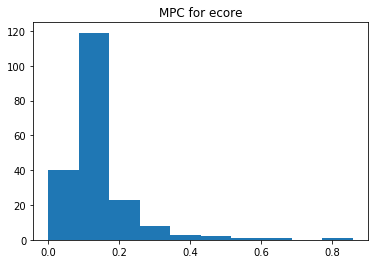

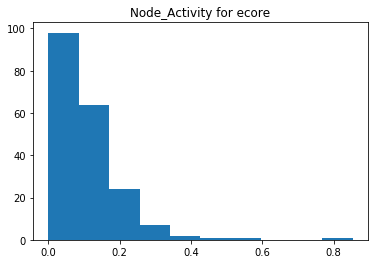

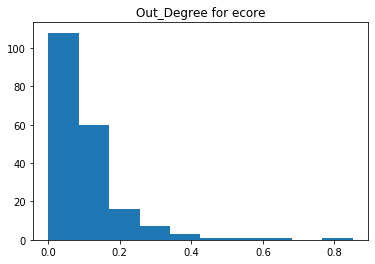

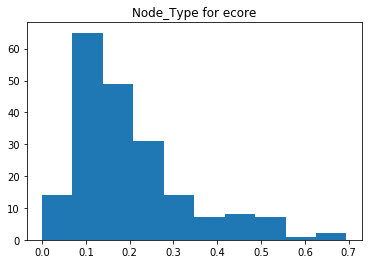

In [114]:
plot_diagram('MPC', human_models, rep, mpc, ks_distance)
plot_diagram('Node_Activity', human_models, rep, na, ks_distance)
plot_diagram('Out_Degree', human_models, rep, od, ks_distance)
plot_diagram('Node_Type', human_models, rep, nt, metrics.manual_ks)
